<img src="http://akhavanpour.ir/notebook/images/srttu.gif" alt="SRTTU" style="width: 150px;"/>

[![Azure Notebooks](https://notebooks.azure.com/launch.png)](https://notebooks.azure.com/import/gh/Alireza-Akhavan/class.vision)

## Multi-label classification with FastAi

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">قبلا این مبحث را در Keras خواندیم.
</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
    
[نوت بوک 33](http://nbviewer.jupyter.org/github/alireza-akhavan/class.vision/blob/master/33-keras-multi-label-part1.ipynb)
و
[جلسه اول مباحث ویژه 2 - دقیقه 43](https://www.aparat.com/v/7hKxw)
</div>
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">حال این موضوع را در کتابخانه FastAI بررسی میکنیم.
</div>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مسیر مجموعه داده
</div>

In [3]:
PATH = 'D:/dataset/planet/'

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد پوشه های مورد نیاز FastAI
</div>

In [4]:

os.makedirs('D:/dataset/planet/models', exist_ok=True)
os.makedirs('D:/dataset/planet/tmp', exist_ok=True)


In [5]:
os.listdir(PATH)

['models', 'planet.zip', 'test-jpg', 'tmp', 'train-jpg', 'train_v2.csv']

## Multi-label versus single-label classification

In [6]:
from fastai.plots import *

In [7]:
def get_1st(path): return glob(f'{path}/*.*')[0]

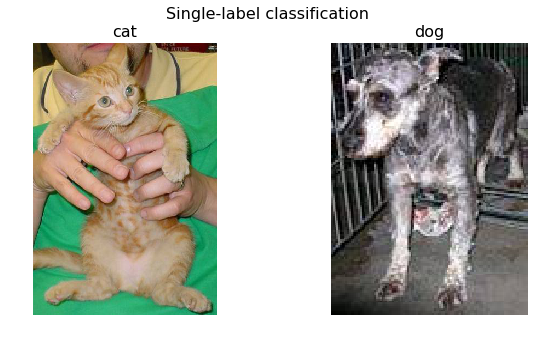

In [8]:
dc_path = "D:/dataset/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

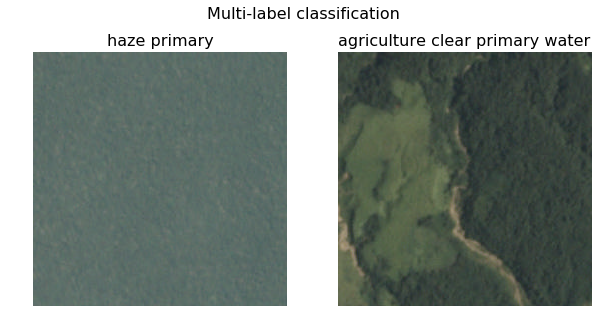

In [9]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more classes. In the previous example, the first images belongs to two classes: *haze* and *primary*. The second image belongs to four classes: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [10]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [11]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [12]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فراخوانی تابع تعریف شده get_data با پارامتر سایز ورودی تصاویر 256 در 256 
</div>

In [13]:
data = get_data(256)

In [14]:
x,y = next(iter(data.val_dl))

RuntimeError: cuda runtime error (46) : all CUDA-capable devices are busy or unavailable at d:\pytorch\pytorch\torch\lib\thc\generic/THCStorage.cu:58

In [ ]:
y

In [ ]:
data.classes

In [ ]:
list(zip(data.classes, y[0]))

In [ ]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [40]:
sz=64

In [41]:
data = get_data(sz)

In [42]:
data = data.resize(int(sz*1.3), 'tmp')

In [ ]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

A Jupyter Widget

[ 0.       0.22404  0.31176  0.82044]                        



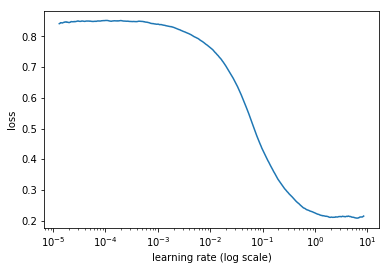

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [ ]:
lr = 0.2

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14882  0.13552  0.87878]                        
[ 1.       0.14237  0.13048  0.88251]                        
[ 2.       0.13675  0.12779  0.88796]                        
[ 3.       0.13528  0.12834  0.88419]                        
[ 4.       0.13428  0.12581  0.88879]                        
[ 5.       0.13237  0.12361  0.89141]                        
[ 6.       0.13179  0.12472  0.8896 ]                        



In [ ]:
lrs = np.array([lr/9,lr/3,lr])

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.12534  0.10926  0.90892]                        
[ 1.       0.12035  0.10086  0.91635]                        
[ 2.       0.11001  0.09792  0.91894]                        
[ 3.       0.1144   0.09972  0.91748]                        
[ 4.       0.11055  0.09617  0.92016]                        
[ 5.       0.10348  0.0935   0.92267]                        
[ 6.       0.10502  0.09345  0.92281]                        



In [ ]:
learn.save(f'{sz}')

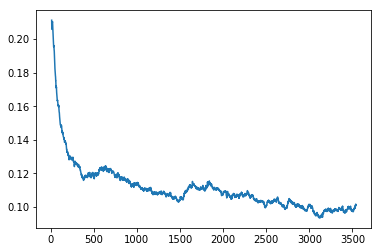

In [ ]:
learn.sched.plot_loss()

In [ ]:
sz=128

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.09729  0.09375  0.91885]                         
[ 1.       0.10118  0.09243  0.92075]                         
[ 2.       0.09805  0.09143  0.92235]                         
[ 3.       0.09834  0.09134  0.92263]                         
[ 4.       0.096    0.09046  0.9231 ]                         
[ 5.       0.09584  0.09035  0.92403]                         
[ 6.       0.09262  0.09059  0.92358]                         



In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.09623  0.08693  0.92696]                         
[ 1.       0.09371  0.08621  0.92887]                         
[ 2.       0.08919  0.08296  0.93113]                         
[ 3.       0.09221  0.08579  0.92709]                         
[ 4.       0.08994  0.08575  0.92862]                         
[ 5.       0.08729  0.08248  0.93108]                         
[ 6.       0.08218  0.08315  0.92971]                         



In [ ]:
sz=256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.09161  0.08651  0.92712]                         
[ 1.       0.08933  0.08665  0.92677]                         
[ 2.       0.09125  0.08584  0.92719]                         
[ 3.       0.08732  0.08532  0.92812]                         
[ 4.       0.08736  0.08479  0.92854]                         
[ 5.       0.08807  0.08471  0.92835]                         
[ 6.       0.08942  0.08448  0.9289 ]                         



In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.08932  0.08218  0.9324 ]                         
[ 1.       0.08654  0.08195  0.93313]                         
[ 2.       0.08468  0.08024  0.93391]                         
[ 3.       0.08596  0.08141  0.93287]                         
[ 4.       0.08211  0.08152  0.93401]                         
[ 5.       0.07971  0.08001  0.93377]                         
[ 6.       0.07928  0.0792   0.93554]                         



In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [ ]:
f2(preds,y)

0.93626519738612801

### End

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دانشگاه تربیت دبیر شهید رجایی<br>مباحث ویژه 2 - یادگیری عمیق پیشرفته<br>علیرضا اخوان پور<br>97-98<br>
</div>
<a href="https://www.srttu.edu/">SRTTU.edu</a> - <a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a>
</div>